In [8]:
import itertools
import random
import numpy 
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path 
import sys
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import warnings
from tabulate import tabulate
warnings.filterwarnings("ignore")

In [9]:
## Read all datasets for every hole size, splitted by starting year, and plot them
YEARS = [str(year) for year in range(1990,2019)]
collaborations_df = pd.read_csv('myDATA/00-collaboration_df_with_starting_years.csv')
min_size = 1
max_size = 28

In [10]:
def get_tot_auths_num():
    file = 'myDATA/00-collaboration_df_with_starting_years.csv'
    collaborations_df = pd.read_csv(file)
    num_auths_by_y = []
    num_new_auths_by_y = []
    YEARS = [str(year) for year in range(1990,2019)]  
    tot_auth = 0
    for i in range(len(YEARS)):
        y = YEARS[i]
        
        # number of new authors in the given year
        num_new_auths_by_y.append(len(collaborations_df.loc[collaborations_df["start_year"] == int(y)]))
        
        # total number of new authors in the given year
        tot_auth += num_new_auths_by_y[i]                         
        num_auths_by_y.append(tot_auth)
    return num_auths_by_y

def get_f_by_auth(df):
    tot_auths = get_tot_auths_num()
    x=[]
    y=[]
    for i in df:
        if(i!="ID"):
            y.append(df[i].mean())
            j=YEARS.index(str(i))
            x.append(tot_auths[j])
            
    return x,y

In [11]:
# return a vector containig the total number of collaboration for each year
def get_tot_collabs_num():
    file = 'myDATA/00-collaboration_df_with_starting_years.csv'
    collaborations_df = pd.read_csv(file)
    num_colls_by_y = []
    YEARS = [str(year) for year in range(1990,2019)]  
    tot_auth = 0
    for i in range(len(YEARS)):
        y = YEARS[i]
        # total number of collaborations in the given year
        num_colls_by_y.append(collaborations_df[y].sum())
    return num_colls_by_y

def get_f_by_colls(df):
    
    tot_colls = get_tot_collabs_num()
    x=[]
    y=[]
    for i in df:
        if(i!="ID"):
            y.append(df[i].mean())
            j=YEARS.index(str(i))
            x.append(tot_colls[j])
            
    return x,y

In [12]:
# return a vector containig the total number of publication for each year
def get_tot_pubs_num():
    file = 'myDATA/02-publication_df_with_starting_years.csv'
    publication_df = pd.read_csv(file)
    num_colls_by_y = []
    YEARS = [str(year) for year in range(1990,2019)]  
    tot_auth = 0
    for i in range(len(YEARS)):
        y = YEARS[i]
        # total number of publication in the given year
        if(i==0):
            num_colls_by_y.append(publication_df[y].sum())
        else:
            num_colls_by_y.append(publication_df[y].sum() + num_colls_by_y[i-1])

    return num_colls_by_y

def get_f_by_pubs(df):
    
    tot_pubs = get_tot_pubs_num()
    x=[]
    y=[]
    for i in df:
        if(i!="ID"):
            y.append(df[i].mean())
            j=YEARS.index(str(i))
            x.append(tot_pubs[j])
            
    return x,y

In [44]:
# computer error between each fitted curve and real data
def err_calc_logfit(y, y1):
    err = 0
    for i in range(len(y)):
        err += pow(abs(y[i] - y1[i]), 2)
    return err

def tot_err_logfit(x_y_fit):
    total_error = 0
    for y in YEARS[:-2]:
        err = err_calc_logfit(x_y_fit[y]["y"], x_y_fit[y]["fit_y"])
        total_error += err
    return str(total_error)

# compute error for the general function 
def err_calc(y, y1):
    err = 0
    for i in range(len(y)):
        err += pow(abs(y[i] - y1[i]), 2)
    return err

def tot_err(alpha, beta, sigma):
    total_error = 0
    for y in YEARS[:-2]:
        err = err_calc(x_y_fit[y]["y"],best_g(x_y_fit[y]["x"], alpha, beta, sigma))
        total_error += err
    return str(total_error)

def func1(t, tv, a, b, sigma):
    return (a*t+b)* pow((np.log(t/tv) + 1), sigma)

def best_g(xdata, alpha, beta, sigma):
    y = []
    for x in xdata:
        y.append(func1(x, xdata[0], alpha, beta, sigma))
    return y

In [48]:
# find the best values for alpha and sigma
import scipy.optimize as optimize

def f(params):
    alpha, beta, sigma = params
    tot = 0
    for v in YEARS[:-2]:
        t_v = x_y_fit[v]["x"][0]
        for i in range(len(x_y_fit[v]["x"])):
            t_i = x_y_fit[v]["x"][i]
            f = x_y_fit[v]["y"][i]
            tot += pow(abs(f - (alpha*t_i+beta) * pow((np.log(t_i/t_v) + 1), sigma)), 2)
    
    return tot

def func(t, a, b, sigma):
    return (a*t+b)* pow((np.log(t) + 1), sigma)

def plot_f_fit(xdata, ydata, curr_x):
    
    popt, pcov = curve_fit(func, [x/curr_x for x in xdata], ydata, maxfev=5000)
    alphas.append(popt[0])
    sigmas.append(popt[2])
    betas.append(popt[1])
    #print("alpha", popt[0], ", sigma", popt[1])
    f = []
    for x in [x/curr_x for x in xdata]:
        f.append(func(x, *popt))
    
    return f

================================================================ HOLE SIZE 1 =================================================================


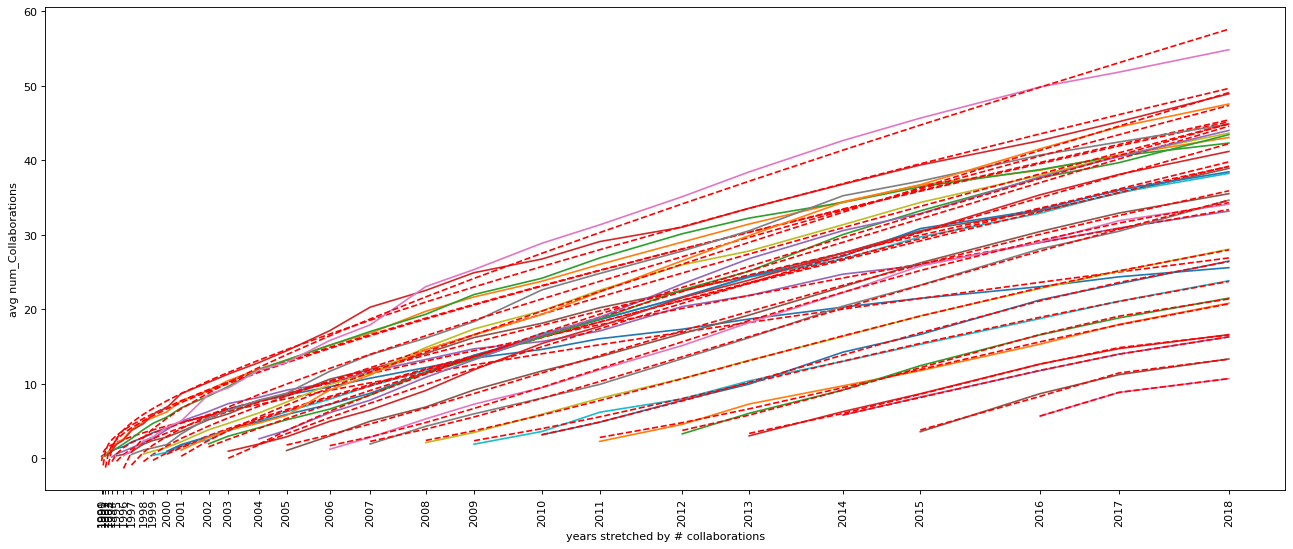

total error for all fitted curves 214.30866674851384


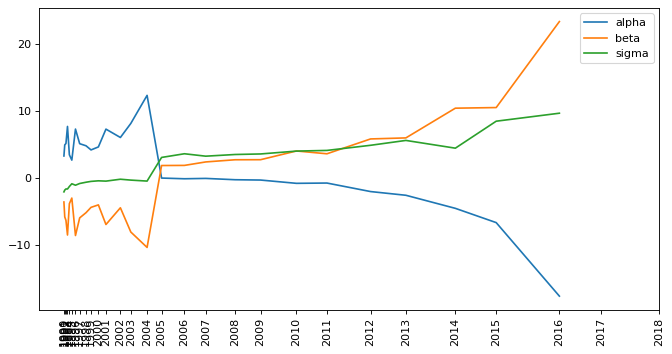

  Sarting Year        alpha       beta      sigma
--------------  -----------  ---------  ---------
          1990    3.2634      -3.62867  -2.11125
          1991    4.91999     -5.86379  -1.84616
          1992    5.13772     -6.38     -1.67432
          1993    7.68706     -8.57567  -1.68624
          1994    3.44468     -3.88234  -1.30748
          1995    2.64295     -3.04197  -0.89961
          1996    7.29235     -8.64909  -1.11577
          1997    5.10166     -6.00725  -0.859194
          1998    4.79076     -5.22994  -0.668437
          1999    4.17048     -4.43242  -0.543384
          2000    4.61766     -4.06242  -0.457184
          2001    7.28462     -7.00339  -0.502544
          2002    6.03286     -4.49489  -0.218679
          2003    8.13492     -8.12544  -0.350182
          2004   12.3391     -10.4329   -0.496486
          2005   -0.0444474    1.83349   3.04452
          2006   -0.148974     1.85116   3.59539
          2007   -0.0969829    2.37024   3.23353
          

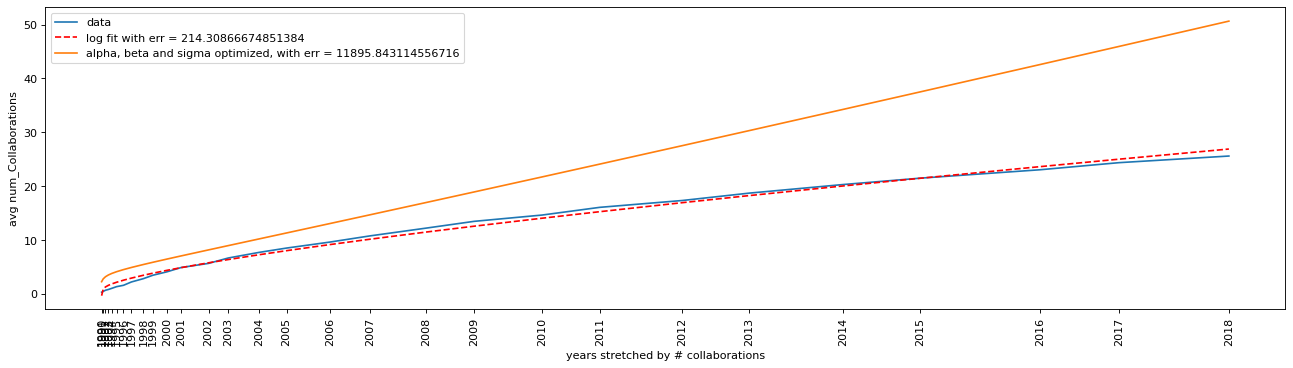

============================================================= starting year 1991 =============================================================


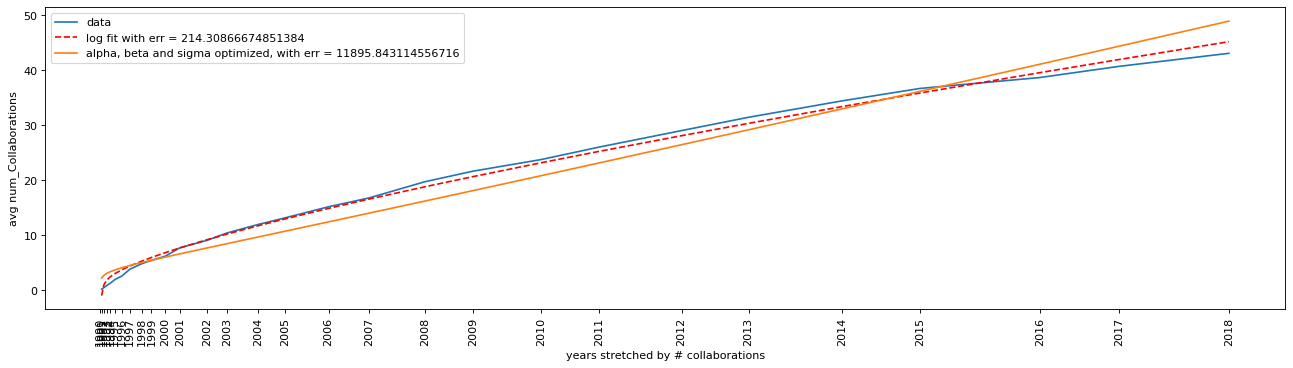

============================================================= starting year 1992 =============================================================


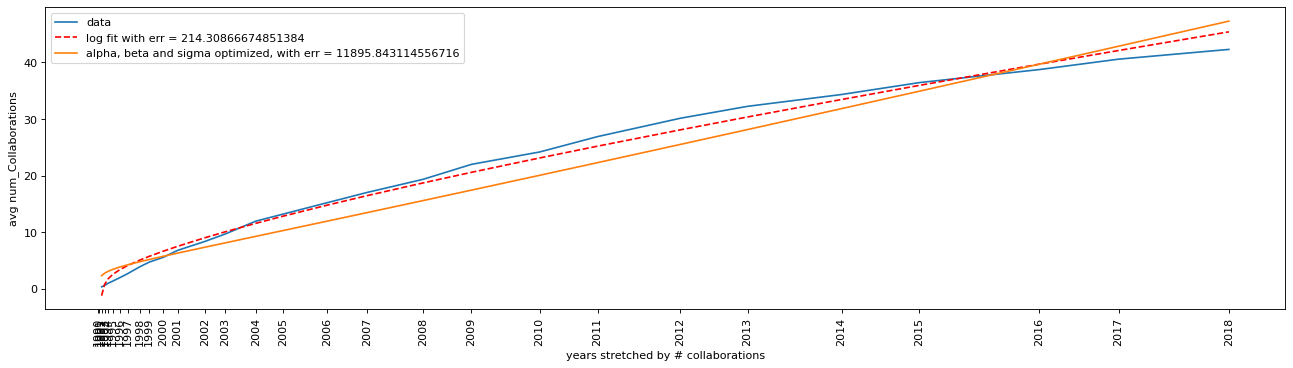

============================================================= starting year 1993 =============================================================


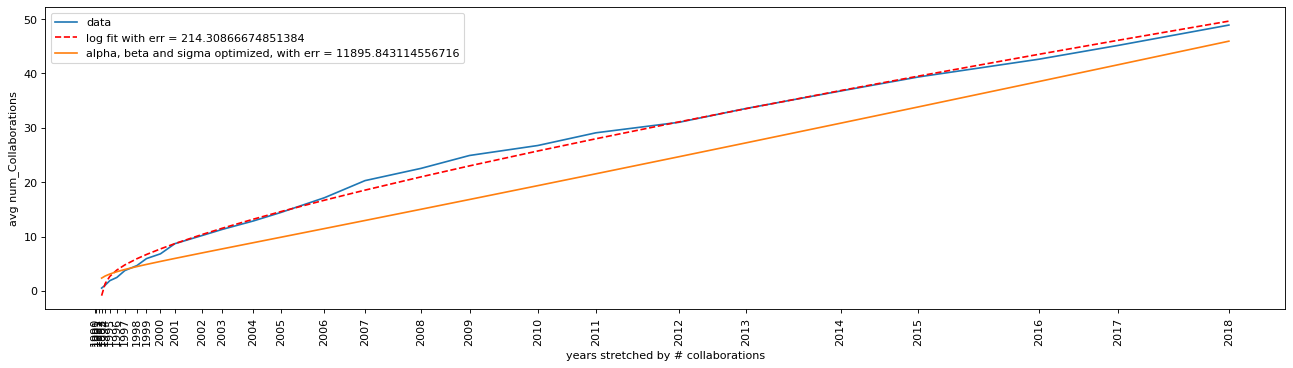

============================================================= starting year 1994 =============================================================


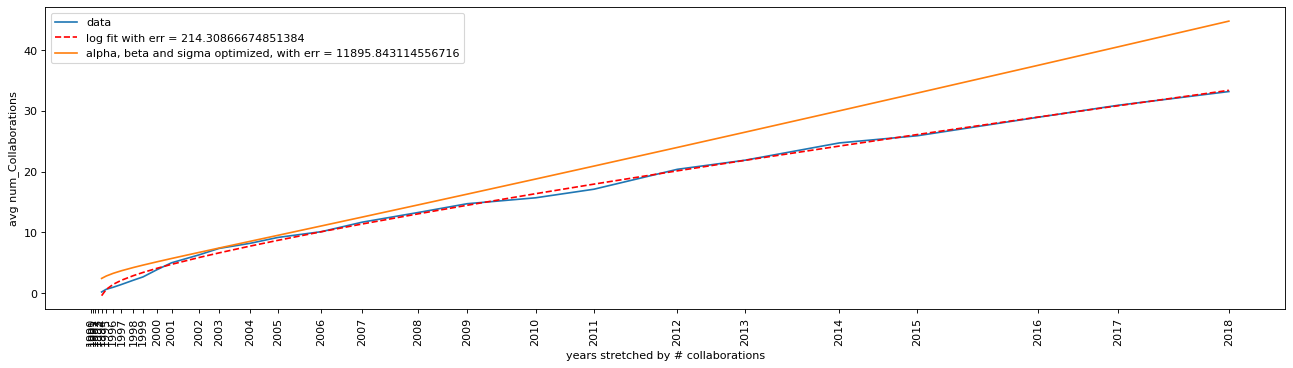

============================================================= starting year 1995 =============================================================


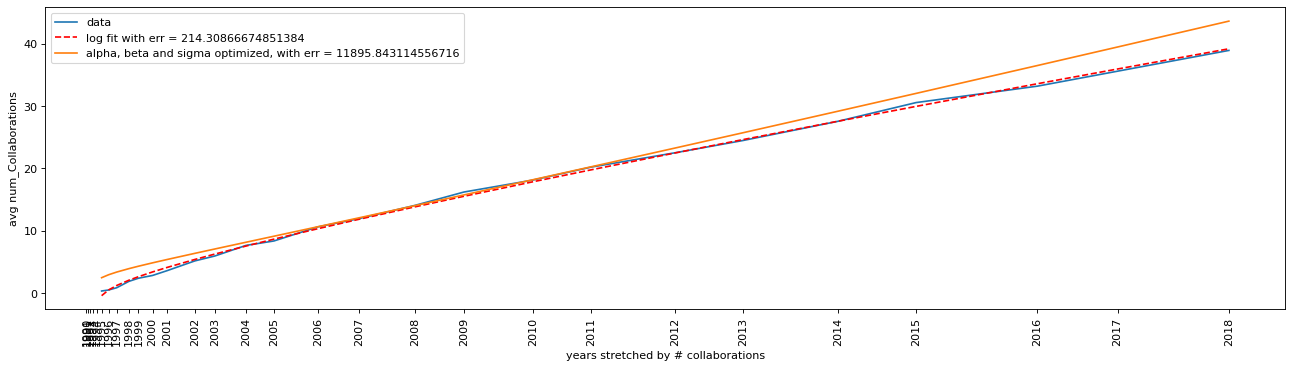

============================================================= starting year 1996 =============================================================


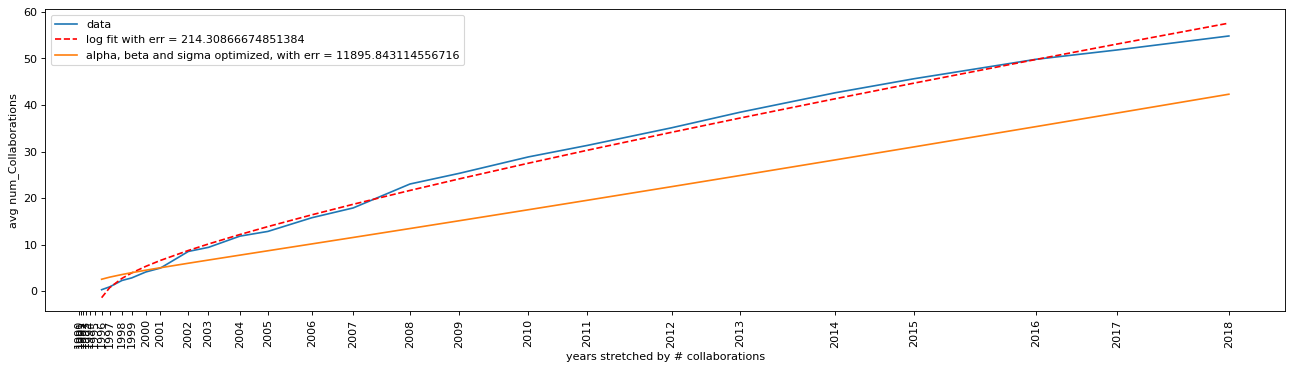

============================================================= starting year 1997 =============================================================


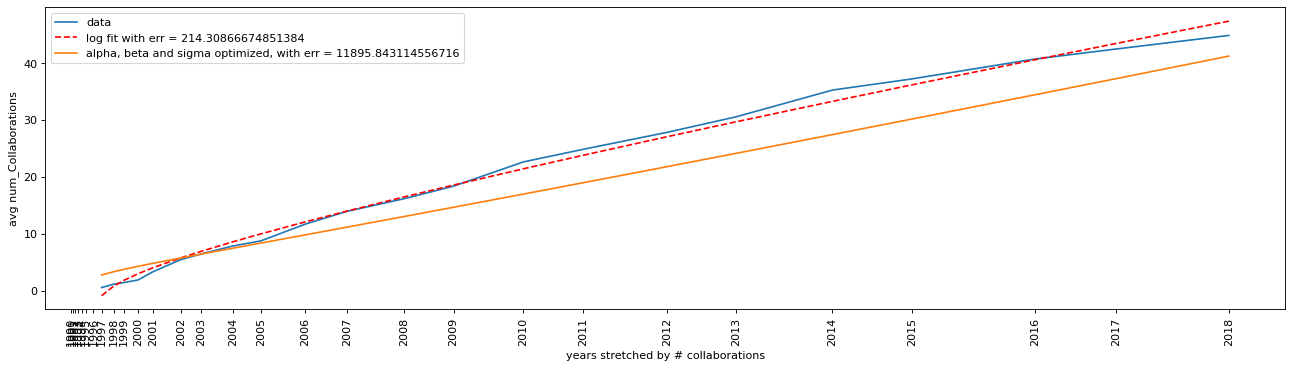

============================================================= starting year 1998 =============================================================


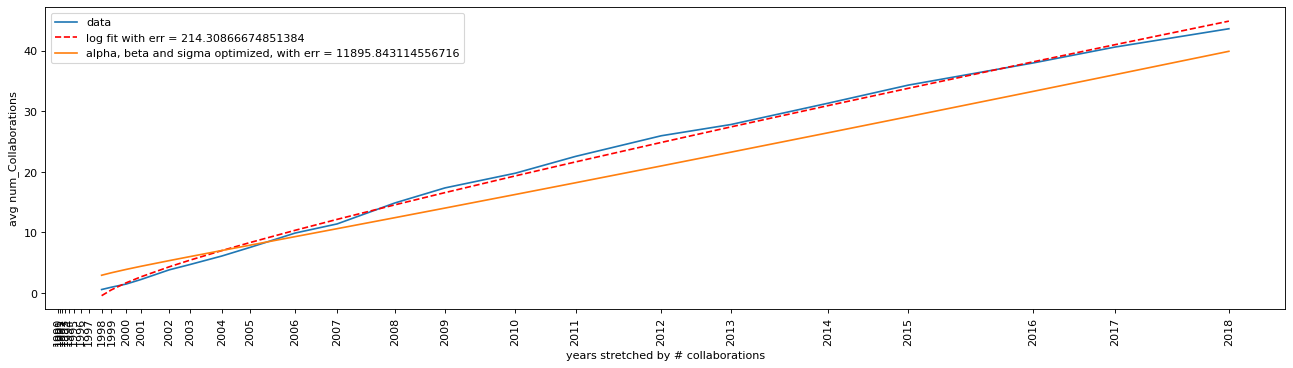

============================================================= starting year 1999 =============================================================


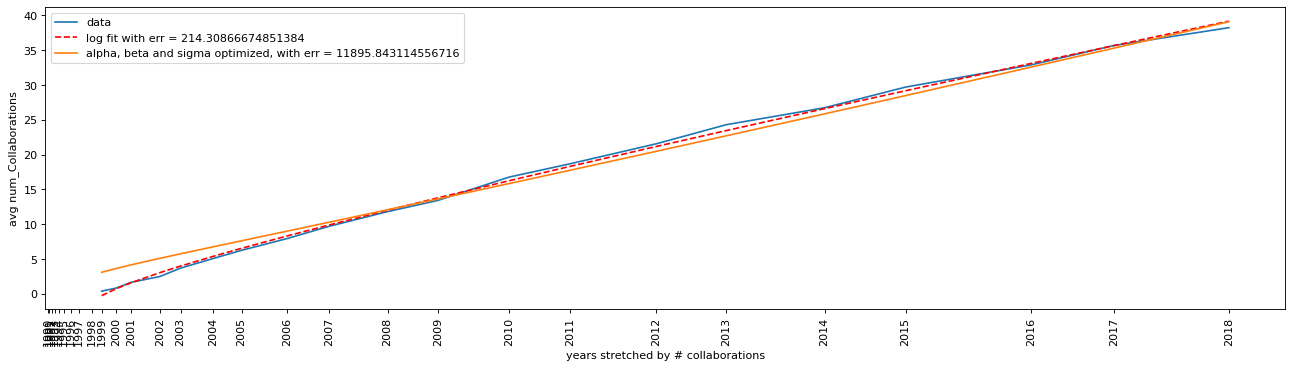

============================================================= starting year 2000 =============================================================


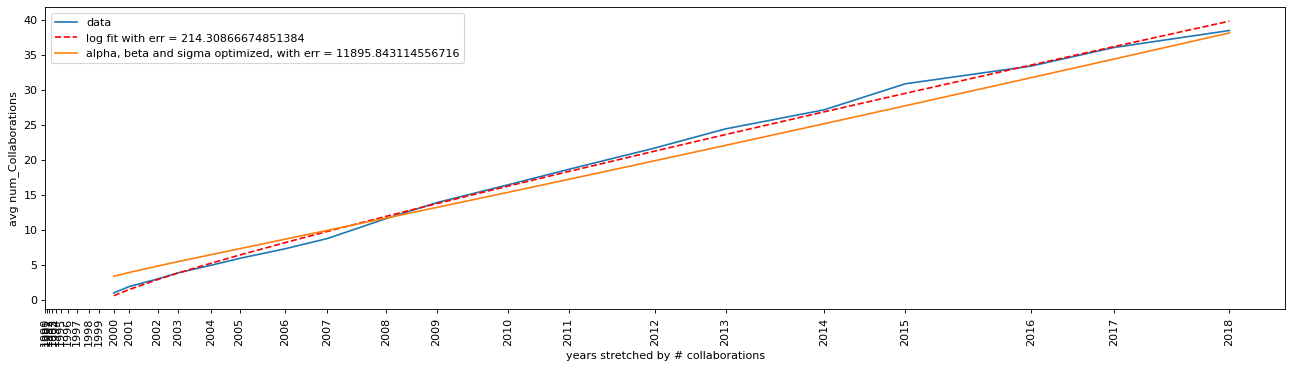

============================================================= starting year 2001 =============================================================


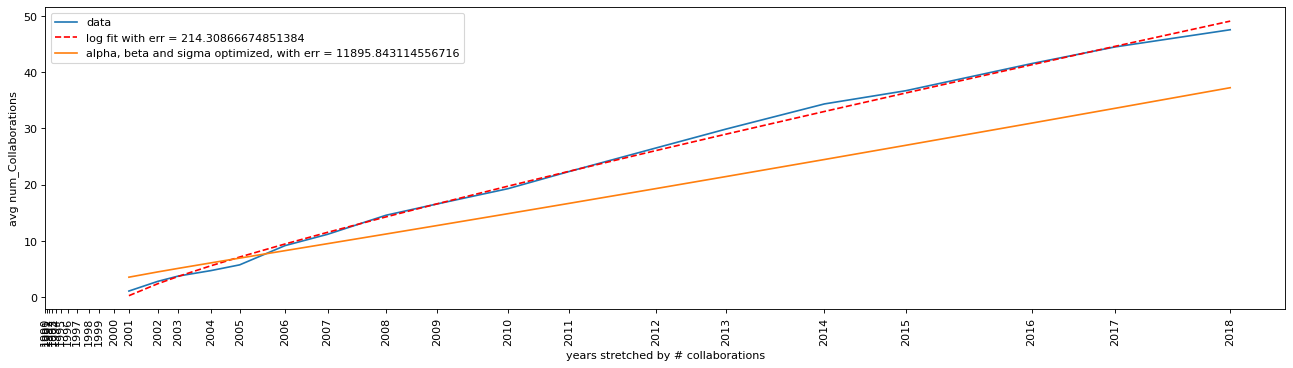

============================================================= starting year 2002 =============================================================


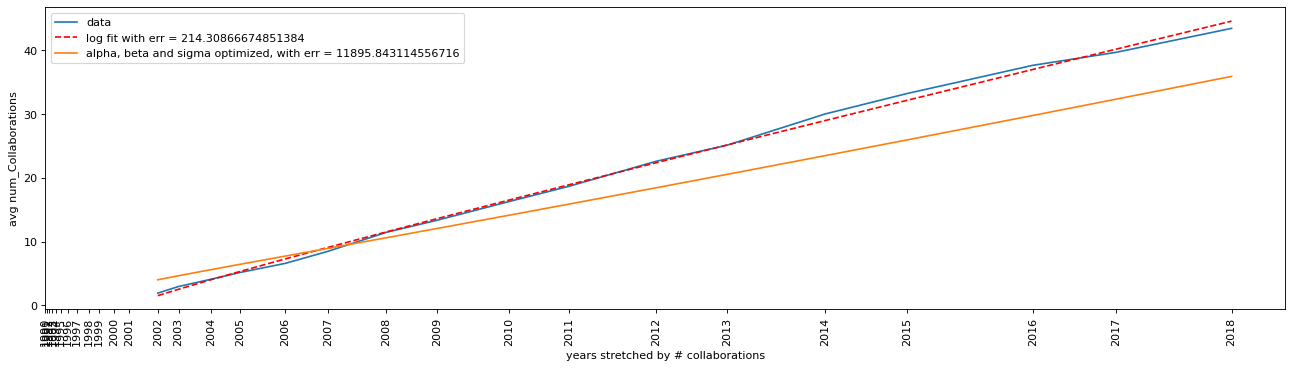

============================================================= starting year 2003 =============================================================


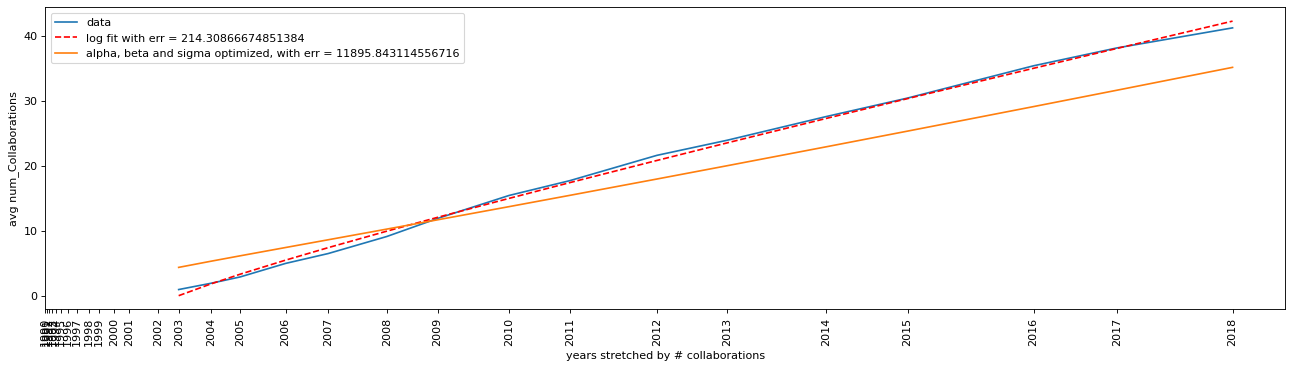

============================================================= starting year 2004 =============================================================


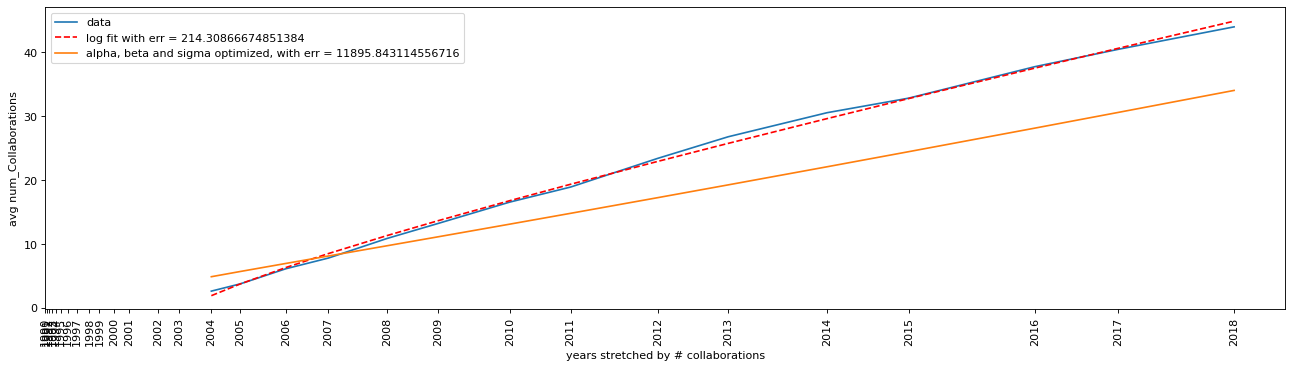

============================================================= starting year 2005 =============================================================


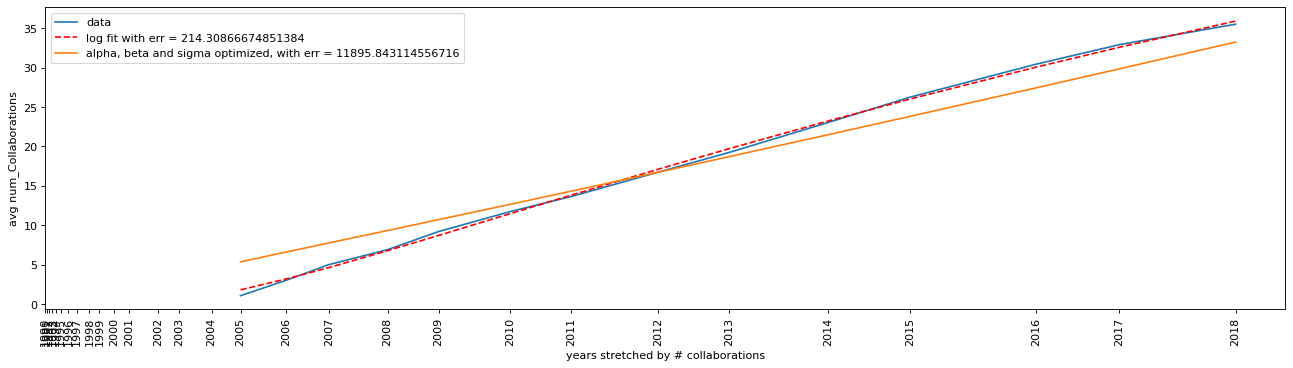

============================================================= starting year 2006 =============================================================


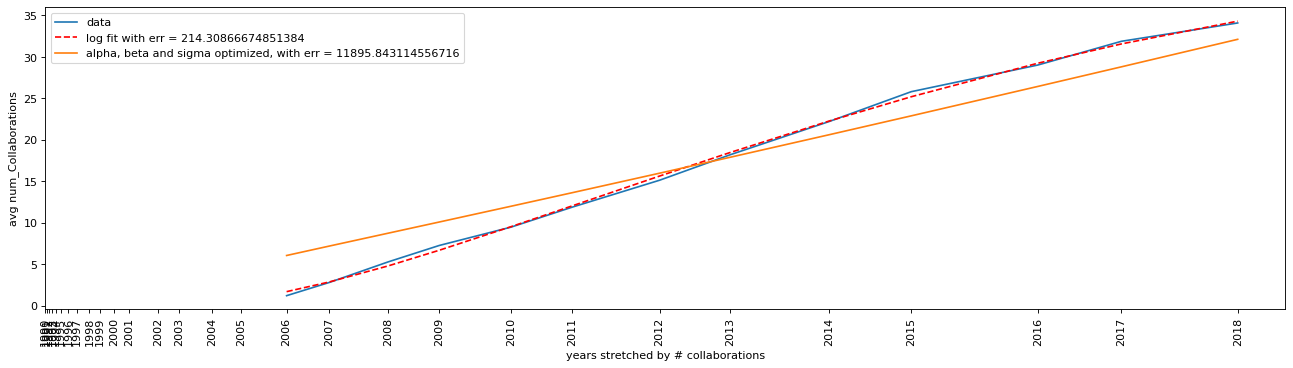

============================================================= starting year 2007 =============================================================


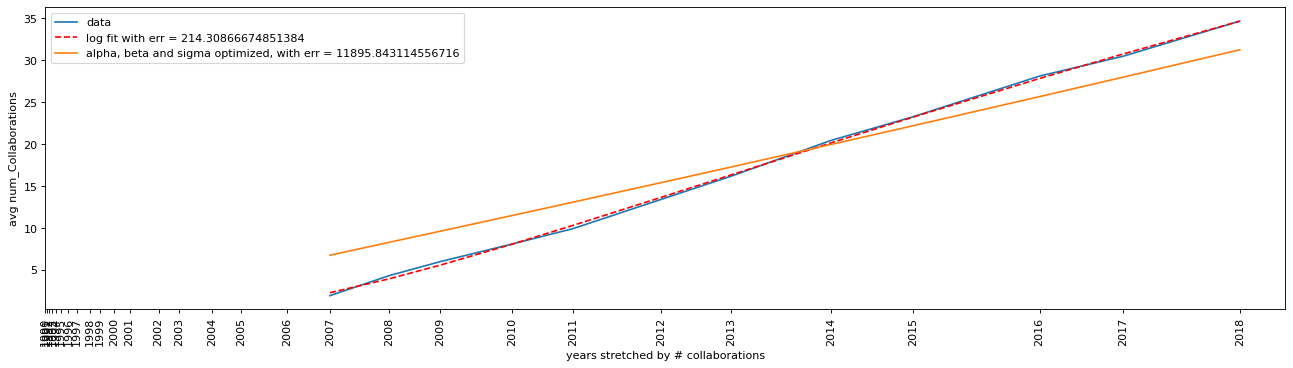

============================================================= starting year 2008 =============================================================


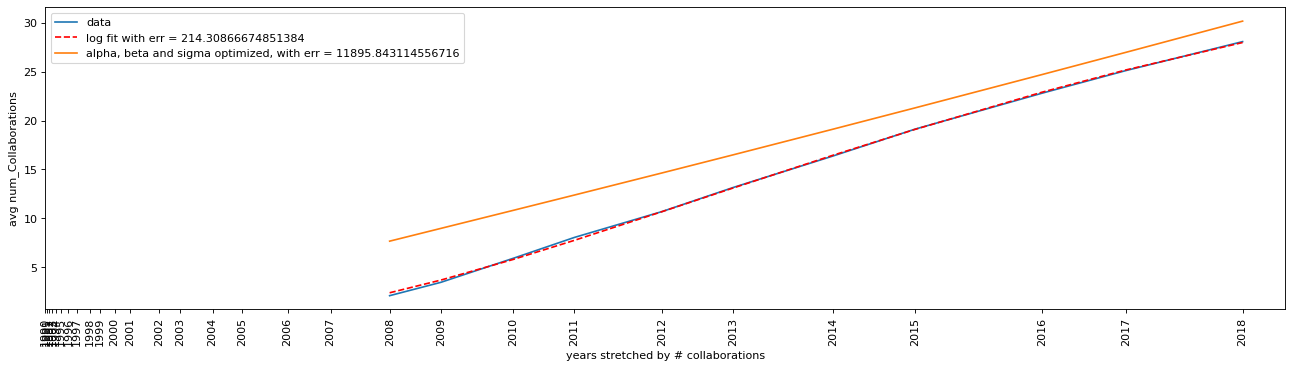

============================================================= starting year 2009 =============================================================


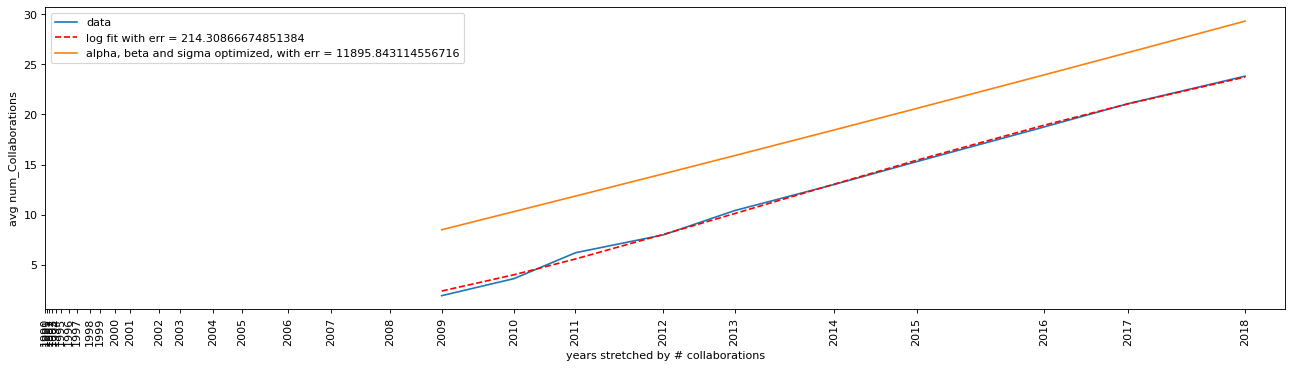

============================================================= starting year 2010 =============================================================


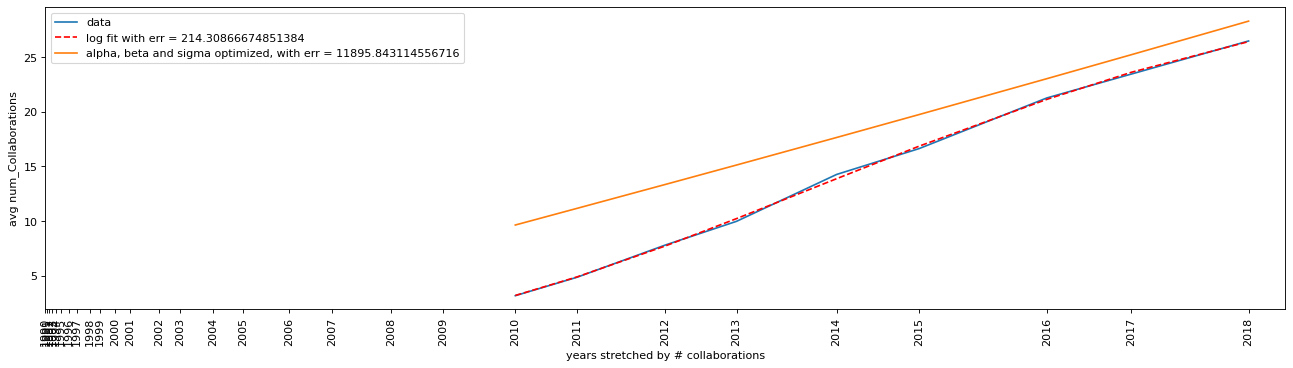

============================================================= starting year 2011 =============================================================


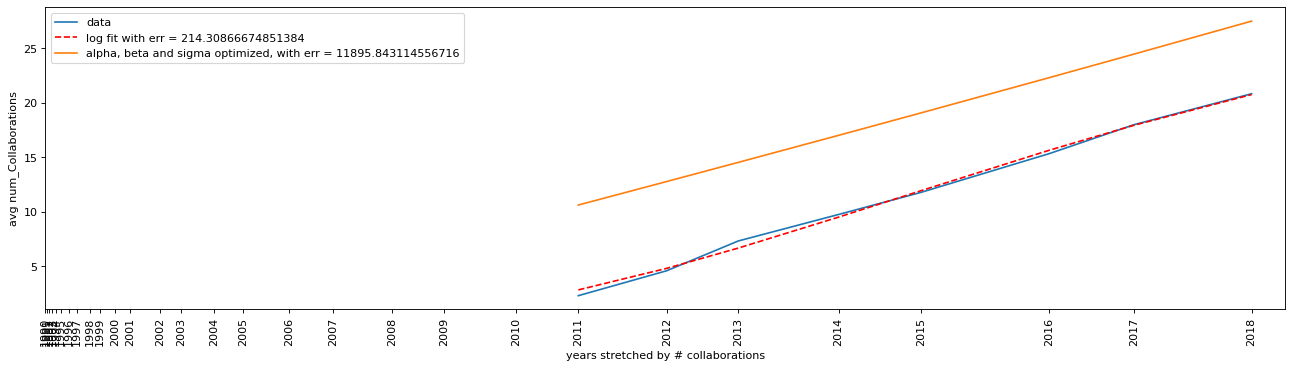

============================================================= starting year 2012 =============================================================


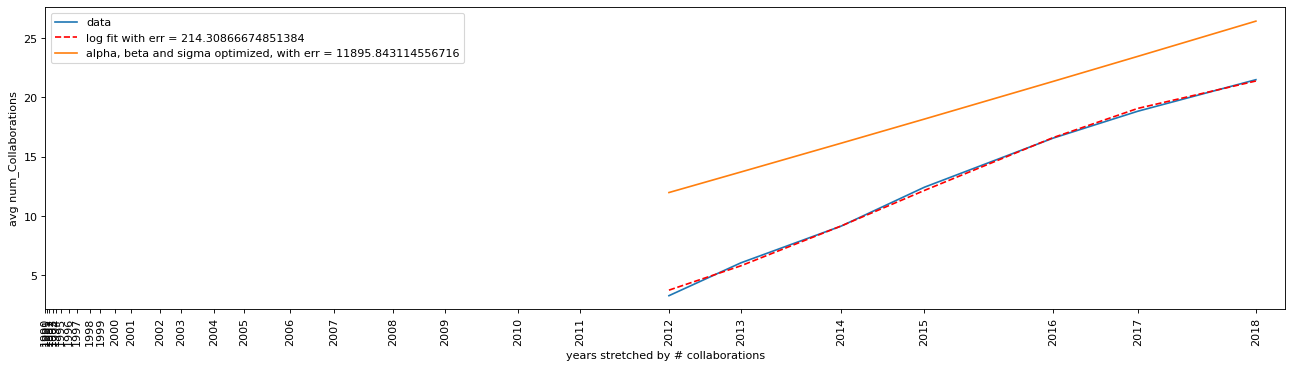

============================================================= starting year 2013 =============================================================


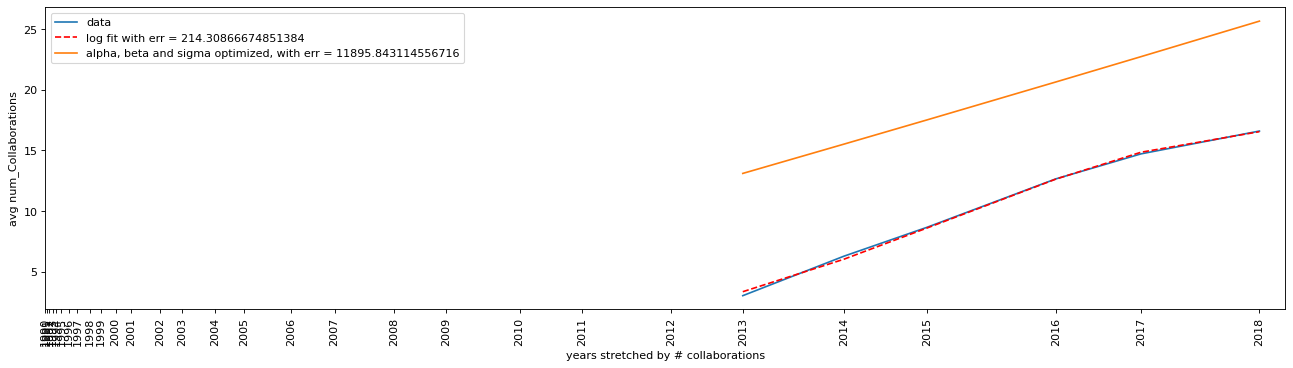

============================================================= starting year 2014 =============================================================


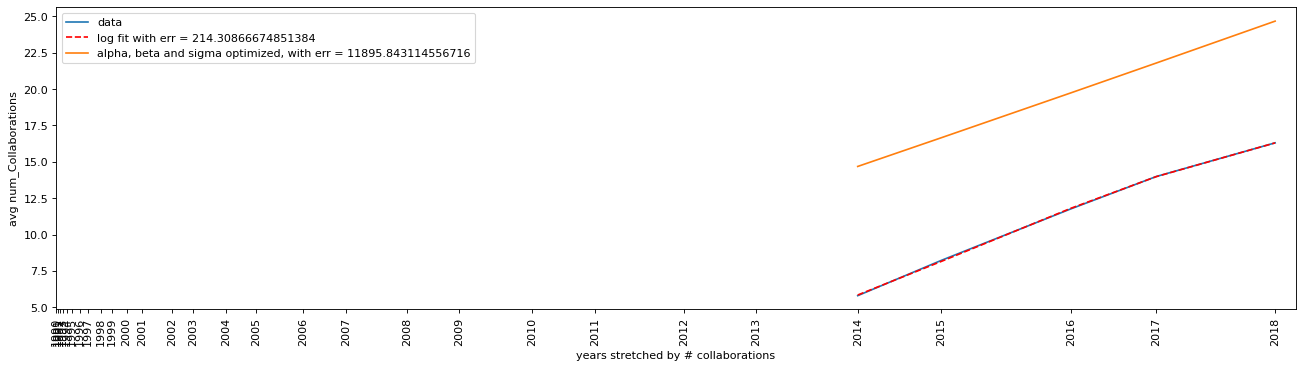

============================================================= starting year 2015 =============================================================


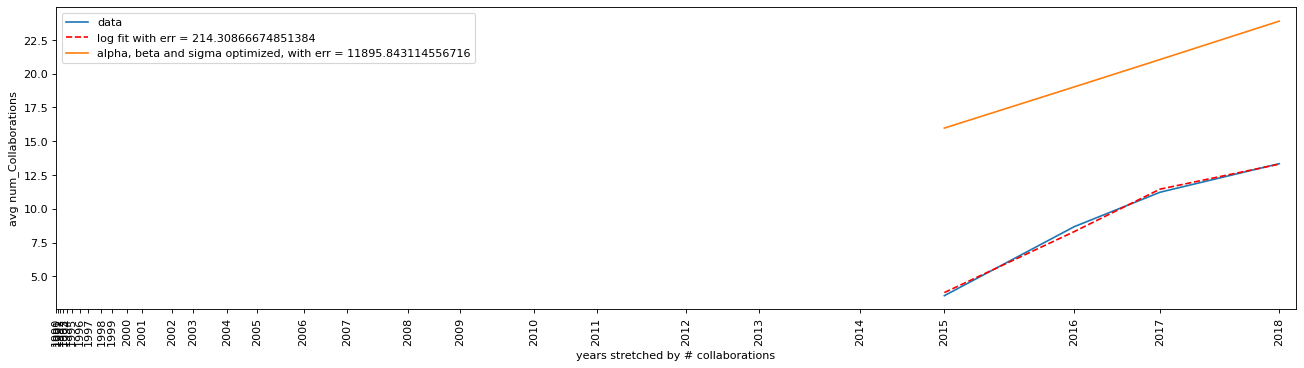

============================================================= starting year 2016 =============================================================


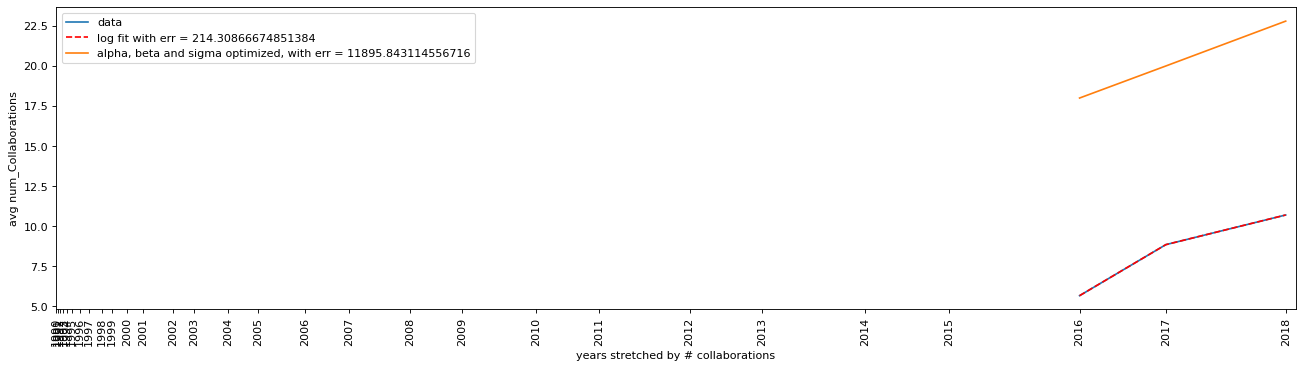

In [58]:
alphas  = []
sigmas = []
betas = []

# Plot fitting function of average trajectories for each starting year and hole lenght stretched by new collaborations
for size in range(min_size, max_size+1):
    alphas  = []
    sigmas = []
    betas = []
    x_y_fit = {}
    
    print((' \033[1m' + "HOLE SIZE "+str(size) + '\033[0m ').center(150, '='))
    path = 'myDATA/10-splitted_by_year/'+str(size)+'_hole_size_splitted'
    if(os.path.exists(path)):
        for y in YEARS:
            file=path+'/'+y+'_collabs_by_starting_year.csv'
            if(os.path.exists(file) and y!="2018"):
                df_y = pd.read_csv(file)
                if(len(df_y)>0):
                    png_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/"+"_holeSize_"+str(size)+"by_num_collaborations_log_fittings_all2"+".png"
                    
                    curr_x = get_tot_collabs_num()[YEARS.index(y)]
                    x_axis, y_axis = get_f_by_colls(df_y)  
                    #print(y, end=" -> ")
                    
                    if(len(x_axis) > 2):
                        fit_y = plot_f_fit(x_axis, y_axis, curr_x)

                        x_y_fit[y] = {"x":x_axis, "y":y_axis, "fit_y":fit_y }
    
    
    plt.figure(figsize=(20, 8), dpi=80)
    for y in YEARS[:-2]:
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"])
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--')
    plt.xlabel("years stretched by # collaborations")
    plt.ylabel("avg num_Collaborations")
    plt.xticks(rotation='vertical')
    plt.xticks(get_tot_collabs_num(), YEARS)
    plt.savefig(png_path)
    plt.show()
    
    data = []
    for i in range(len(YEARS) - 2):
        data.append([YEARS[i], alphas[i], betas[i], sigmas[i]])
    
    print("total error for all fitted curves", tot_err_logfit(x_y_fit))
    
    
    
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(get_tot_collabs_num()[:-2], alphas, label="alpha")
    plt.plot(get_tot_collabs_num()[:-2], betas, label="beta")
    plt.plot(get_tot_collabs_num()[:-2], sigmas, label="sigma")
    plt.xticks(get_tot_collabs_num(), YEARS)
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()
    
    print (tabulate(data, headers=["Sarting Year", "alpha", "beta", "sigma"]))
    
    initial_guess = [1, 1, 1]
    result = optimize.minimize(f, initial_guess)
    fitted_params = result.x
    
    ## both optimized values 
    alpha = fitted_params[0]
    beta = fitted_params[1]
    sigma = fitted_params[2]
    
    print("optimized params: ", "alpha", alpha, "beta", beta, "sigma", sigma)
    
    for y in YEARS[:-2]:
        print((' \033[1m' + "starting year "+str(y) + '\033[0m ').center(150, '='))
        plt.figure(figsize=(20, 5), dpi=80)

        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"], label="data")
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--', label="log fit with err = "+tot_err_logfit(x_y_fit))
        plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha, beta, sigma), label="alpha, beta and sigma optimized, with err = "+tot_err(alpha, beta, sigma))

        plt.xlabel("years stretched by # collaborations")
        plt.ylabel("avg num_Collaborations")
        plt.xticks(rotation='vertical')
        plt.xticks(get_tot_collabs_num(), YEARS)
        plt.legend()
        
        fig_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/" + str(y) + "_by_num_collaborations_alpha_sigma_beta_log_fitting_generalized.png"
        plt.savefig(fig_path)
        plt.show()
        
    break

In [59]:
alphas  = []
sigmas = []
betas = []

# Plot fitting function of average trajectories for each starting year and hole lenght stretched by new authors
for size in range(min_size, max_size+1):
    alphas  = []
    sigmas = []
    betas = []
    x_y_fit = {}
    
    print((' \033[1m' + "HOLE SIZE "+str(size) + '\033[0m ').center(150, '='))
    path = 'myDATA/10-splitted_by_year/'+str(size)+'_hole_size_splitted'
    if(os.path.exists(path)):
        for y in YEARS:
            file=path+'/'+y+'_collabs_by_starting_year.csv'
            if(os.path.exists(file) and y!="2018"):
                df_y = pd.read_csv(file)
                if(len(df_y)>0):
                    png_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/"+"_holeSize_"+str(size)+"by_num_auths_log_fittings_all2"+".png"
                    
                    curr_x = get_tot_auths_num()[YEARS.index(y)]
                    x_axis, y_axis = get_f_by_auth(df_y)  
                    #print(y, end=" -> ")
                    if(len(x_axis) > 2):
                        fit_y = plot_f_fit(x_axis, y_axis, curr_x)

                        x_y_fit[y] = {"x":x_axis, "y":y_axis, "fit_y":fit_y }
    
    
    plt.figure(figsize=(20, 8), dpi=80)
    for y in YEARS[:-2]:
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"])
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--')
    plt.xlabel("years stretched by # authors")
    plt.ylabel("avg num_Collaborations")
    plt.xticks(rotation='vertical')
    plt.xticks(get_tot_auths_num(), YEARS)
    plt.savefig(png_path)
    plt.show()
    
    data = []
    for i in range(len(YEARS) - 2):
        data.append([YEARS[i], alphas[i], betas[i], sigmas[i]])
    
    print("total error for all fitted curves", tot_err_logfit(x_y_fit))
    
    
    
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(get_tot_auths_num()[:-2], alphas, label="alpha")
    plt.plot(get_tot_auths_num()[:-2], betas, label="beta")
    plt.plot(get_tot_auths_num()[:-2], sigmas, label="sigma")
    plt.xticks(get_tot_auths_num(), YEARS)
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()
    
    print (tabulate(data, headers=["Sarting Year", "alpha", "beta", "sigma"]))
    
    initial_guess = [1, 1, 1]
    result = optimize.minimize(f, initial_guess)
    fitted_params = result.x
    
    ## both optimized values 
    alpha = fitted_params[0]
    beta = fitted_params[1]
    sigma = fitted_params[2]
    print("optimized params: ", "alpha", alpha, "beta", beta, "sigma", sigma)

    for y in YEARS[:-2]:
        print((' \033[1m' + "starting year "+str(y) + '\033[0m ').center(150, '='))
        plt.figure(figsize=(20, 5), dpi=80)

        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"], label="data")
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--', label="log fit with err = "+tot_err_logfit(x_y_fit))
        plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha, beta, sigma), label="alpha, beta and sigma optimized, with err = "+tot_err(alpha, beta, sigma))

        plt.xlabel("years stretched by # authors")
        plt.ylabel("avg num_Collaborations")
        plt.xticks(rotation='vertical')print
        plt.xticks(get_tot_auths_num(), YEARS)
        plt.legend()
        
        fig_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/" + str(y) + "_by_num_authors_alpha_sigma_beta_log_fitting_generalized.png"
        plt.savefig(fig_path)
        plt.show()
    
    break

SyntaxError: invalid syntax (<ipython-input-59-a8d72bd5b6b8>, line 81)

In [ ]:
alphas  = []
sigmas = []
betas = []

# Plot fitting function of average trajectories for each starting year and hole lenght stretched by new publications
for size in range(min_size, max_size+1):
    alphas  = []
    sigmas = []
    betas = []
    x_y_fit = {}
    
    print((' \033[1m' + "HOLE SIZE "+str(size) + '\033[0m ').center(150, '='))
    path = 'myDATA/10-splitted_by_year/'+str(size)+'_hole_size_splitted'
    if(os.path.exists(path)):
        for y in YEARS:
            file=path+'/'+y+'_collabs_by_starting_year.csv'
            if(os.path.exists(file) and y!="2018"):
                df_y = pd.read_csv(file)
                if(len(df_y)>0):
                    png_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/"+"_holeSize_"+str(size)+"by_num_pubs_log_fittings_all2"+".png"
                    
                    curr_x = get_tot_pubs_num()[YEARS.index(y)]
                    x_axis, y_axis = get_f_by_pubs(df_y)  
                    #print(y, end=" -> ")
                    if(len(x_axis) > 2):
                        fit_y = plot_f_fit(x_axis, y_axis, curr_x)

                        x_y_fit[y] = {"x":x_axis, "y":y_axis, "fit_y":fit_y }
    
    
    plt.figure(figsize=(20, 8), dpi=80)
    for y in YEARS[:-2]:
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"])
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--')
    plt.xlabel("years stretched by # publications")
    plt.ylabel("avg num_Collaborations")
    plt.xticks(rotation='vertical')
    plt.xticks(get_tot_pubs_num(), YEARS)
    plt.savefig(png_path)
    plt.show()
    
    data = []
    for i in range(len(YEARS) - 2):
        data.append([YEARS[i], alphas[i], betas[i], sigmas[i]])
    
    print("total error for all fitted curves", tot_err_logfit(x_y_fit))
    
    
    
    plt.figure(figsize=(10, 5), dpi=80)
    plt.plot(get_tot_pubs_num()[:-2], alphas, label="alpha")
    plt.plot(get_tot_pubs_num()[:-2], betas, label="beta")
    plt.plot(get_tot_pubs_num()[:-2], sigmas, label="sigma")
    plt.xticks(get_tot_pubs_num(), YEARS)
    plt.xticks(rotation='vertical')
    plt.legend()
    plt.show()
    
    print (tabulate(data, headers=["Sarting Year", "alpha", "beta", "sigma"]))
    
    initial_guess = [1, 1, 1]
    result = optimize.minimize(f, initial_guess)
    fitted_params = result.x
    
    ## both optimized values 
    alpha = fitted_params[0]
    beta = fitted_params[1]
    sigma = fitted_params[2]
    print("optimized params: ", "alpha", alpha, "beta", beta, "sigma", sigma)

    for y in YEARS[:-2]:
        print((' \033[1m' + "starting year "+str(y) + '\033[0m ').center(150, '='))
        plt.figure(figsize=(20, 5), dpi=80)

        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["y"], label="data")
        plt.plot(x_y_fit[y]["x"], x_y_fit[y]["fit_y"], 'r--', label="log fit with err = "+tot_err_logfit(x_y_fit))
        plt.plot(x_y_fit[y]["x"], best_g(x_y_fit[y]["x"], alpha, beta, sigma), label="alpha, beta and sigma optimized, with err = "+tot_err(alpha, beta, sigma))

        plt.xlabel("years stretched by # publications")
        plt.ylabel("avg num_Collaborations")
        plt.xticks(rotation='vertical')
        plt.xticks(get_tot_pubs_num(), YEARS)
        plt.legend()
        
        fig_path = "myDATA/10-splitted_by_year/"+str(size)+"_hole_size_splitted/trajectories_avg_plt/" + str(y) + "_by_num_publications_alpha_sigma_beta_log_fitting_generalized.png"
        plt.savefig(fig_path)
        plt.show()
    
    break